Utilisation d'une layer Tokenizer pour tester les n-gramms

In [1]:

import os

import importlib

import RktnChallenge.RktnModel
importlib.reload(RktnChallenge.RktnModel)
from RktnChallenge.RktnModel import ModelTrainer

import tensorflow as tf
from tensorflow.keras.layers import Embedding, Flatten, Dense, Input
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import gc


2023-09-08 16:17:49.481608: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-08 16:17:49.516276: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 16:17:50.173205: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:

#donne de tres mauvais resultats
from transformers import CamembertTokenizer, TFCamembertForSequenceClassification, CamembertConfig
import numpy as np

tokenizer = CamembertTokenizer.from_pretrained("camembert-base")
vocab = tokenizer.get_vocab()

vocab_np = np.array(list(vocab.keys()))

vocab_tf = tf.constant(vocab_np)

In [5]:

# Chargez vos données depuis un fichier CSV (par exemple, "data_tr_lemm.csv")
# Assurez-vous d'avoir les données correctement prétraitées dans ce fichier.
RktnModel = ModelTrainer("data_tr_lemm.csv")

# Vectorisation des données
_X = RktnModel.data["merged_desi_desc"].values
y = RktnModel.encodeLabel("prdtypecode")
label_size = RktnModel.getLabelSize()

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(_X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [3]:

import pandas as pd
def generate_vocab(X):
    vectorize_layer = TextVectorization(
        max_tokens=None,
        output_mode='int',
        output_sequence_length=1000,
    )
    vectorize_layer.adapt(X)
    vocab = vectorize_layer.get_vocabulary()
    vocab_df = pd.DataFrame({'mot': vocab})
    vocab_df.to_csv('vocabulaire.csv', index=False)
    
generate_vocab(_X)

2023-09-08 14:17:39.432638: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-08 14:17:39.724842: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-08 14:17:39.725153: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-08 14:17:39.726919: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-08 14:17:39.727201: I tensorflow/compile

In [ ]:
vocab_df = pd.read_csv("nettoye.csv", encoding='latin-1')
vocab = vocab_df['mot'].tolist()
vocab = list(set(vocab))

In [6]:
import pandas as pd
import numpy as np
from tqdm import tqdm 




import spacy

nlp = spacy.load("fr_core_news_sm")

def qualify(mot):
    if(type(mot) == str):
        doc = nlp(mot)
        return doc[0].pos_
    return "PUNCT"

vocab_df = pd.read_csv("vocabulaire.csv", encoding='latin-1')
vocab = vocab_df['mot'].tolist()
vocab = list(set(vocab))
vocab_df["type"] = vocab_df["mot"].apply(lambda mot:qualify(mot))




In [7]:
vocab_df.to_csv('vocabulaire_typed.csv', index=False)

In [3]:
import pandas as pd
vocab_df = pd.read_csv("vocabulaire.csv", encoding='latin-1')

neg_word =["a","b","c","d","e","f","j","n","o","p","r","s","t","u","y",
           "aaacaracteristiquer","aaproduit","aanumero","aanon","angrijpend","aand","aaltonen","aalto",
           "aalborg","aaitem","aaform","aafeature","aadimension","aadapter","aacertification","aaccelerateura",
           "aacaracteristique","aabatteries","aaahkada","aaah","aaacontenu","abcdefghij","abfallschublade","abgebaut","tout",
           "plus","qualite","facile","ce","sans","oui","non","inclus","tre","bon","anti","forfaire","ndeg","ideal","vie","parfaire",
           "rapide","ainsi","remarqu","apre","livraison","peu","nbsp","deg","camer","chaud","ab","ultra","easy","throw","parfaitement",
           "gb","do","requÃ©rir","fr","parfait","massif","faible","ni","ii","pur","aimer","cmhauteur","wet","hayward","poindre","partout",
           "ceci","cela","efficacement","soulagement","apparaÃ®tre","parce","que","cmlargeur","pl","en","ft","kilomÃ¨tre","advertisingpromotional",
           "adventurebreathable","adventurebreathabl","adultesavec","adultescapacite","adsorptionfirmly","adorablefeature","administrationsdimension",
           "adjuvantconcentration","adjutablereglage","adjustmentspecification","adjustmentinfraredinduction","adjustableneckerchieffitsmanydifferentsizeforpet",
           "adhesivecaracteristique","additifsorganoleptique","compatibledirectxadditionnelle","compatibledirectxadditionnel","compatibilitecompatibl",


           ]

vocab_df = vocab_df[~vocab_df['mot'].isin(neg_word)]

vocab = vocab_df['mot'].tolist()
vocab = list(set(vocab))

In [6]:

import pandas as pd

# Création du modèle
text_dataset = tf.data.Dataset.from_tensor_slices(_X)

max_seq_length = 1000
_latent_dim = 150

vectorize_layer = TextVectorization(
    max_tokens=None,
    output_mode='int',
    output_sequence_length=max_seq_length,
    vocabulary = vocab
    )

#vectorize_layer.adapt(text_dataset.batch(64))

#vocab = vectorize_layer.get_vocabulary()
#vocab_df = pd.DataFrame({'mot': vocab})
#vocab_df.to_csv('vocabulaire.csv', index=False)


vocab_size = vectorize_layer.vocabulary_size()

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)
model.add(Embedding(input_dim=vocab_size, output_dim=_latent_dim, input_length=max_seq_length, mask_zero=True))
model.add(Flatten())
model.add(Dense(units=label_size, activation="softmax"))

# Compilation du modèle
optimizer = AdamW(weight_decay=0.01, learning_rate=0.001)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()


2023-09-08 16:19:20.536237: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-08 16:19:20.612085: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-08 16:19:20.612702: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-08 16:19:20.615240: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-08 16:19:20.615709: I tensorflow/compile

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 1000)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 1000, 150)         21288900  
                                                                 
 flatten (Flatten)           (None, 150000)            0         
                                                                 
 dense (Dense)               (None, 27)                4050027   
                                                                 
Total params: 25338927 (96.66 MB)
Trainable params: 25338927 (96.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=6, batch_size=100,validation_data=(X_val, y_val))


Epoch 1/6


2023-09-08 16:19:35.472972: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f72b4d3f4b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-08 16:19:35.473017: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA TITAN X (Pascal), Compute Capability 6.1
2023-09-08 16:19:35.476434: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-08 16:19:35.600671: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-08 16:19:35.675396: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


510/510 [==============================] - 100s 192ms/step - loss: 1.3923 - accuracy: 0.6238 - val_loss: 0.7390 - val_accuracy: 0.7932
Epoch 2/6
510/510 [==============================] - 72s 141ms/step - loss: 0.4124 - accuracy: 0.8875 - val_loss: 0.5981 - val_accuracy: 0.8266
Epoch 3/6
510/510 [==============================] - 61s 120ms/step - loss: 0.1717 - accuracy: 0.9611 - val_loss: 0.5834 - val_accuracy: 0.8312
Epoch 4/6
510/510 [==============================] - 57s 111ms/step - loss: 0.0810 - accuracy: 0.9850 - val_loss: 0.5985 - val_accuracy: 0.8312
Epoch 5/6
510/510 [==============================] - 52s 102ms/step - loss: 0.0495 - accuracy: 0.9926 - val_loss: 0.6149 - val_accuracy: 0.8271
Epoch 6/6
 35/510 [=>............................] - ETA: 47s - loss: 0.0314 - accuracy: 0.9946

KeyboardInterrupt: 

531/531 [==============================] - 1s 3ms/step
weighted F1 score: 0.8295133810972148


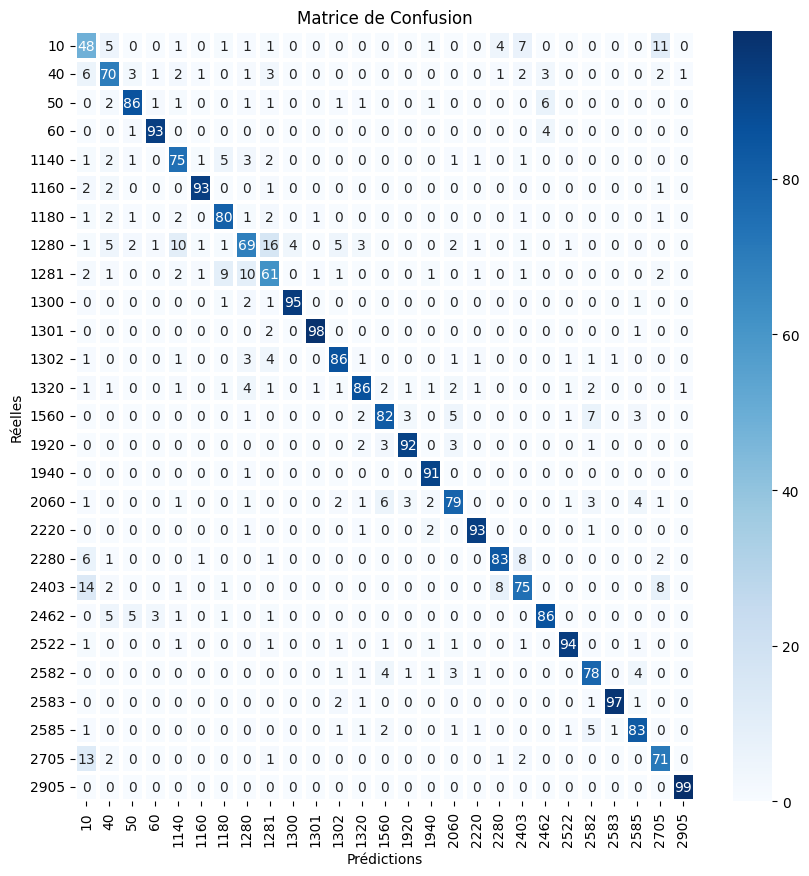

/home/pec/miniconda3/envs/tfGPU/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


NotImplementedError: Save or restore weights that is not an instance of `tf.Variable` is not supported in h5, use `save_format='tf'` instead. Received a model or layer TextVectorization with weights [<keras.src.layers.preprocessing.index_lookup.VocabWeightHandler object at 0x7fc952586e80>]

In [44]:

# Prédictions et évaluation
y_pred_test = model.predict(X_test)
y_pred_id = y_pred_test.argmax(axis=-1)
RktnModel.evaluateTestResults(y_test, y_pred_id)

# Sauvegarde du modèle
model.save("model_simple.h5")
